<a href="https://colab.research.google.com/github/jevabrir/ModReg_PrecioAuto/blob/main/Equipo_1_ProyEstad%C3%ADstica_UVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

##**Equipo 1:**

**Objetivo: Estimar la Density of Base Fluid (ρbf)**


Variables en el modelo:
Dependiente:
*  Y= Density (ρ)

Independientes:
Seleccionen Tres variables del dataset que tengan una correlación alta

*  X1= Density of Base Fluid (ρbf)
*  X2= Volume Concentration (ϕ)
*  X3= Volume Mixture of Particle 2

In [ ]:
# Leer el archivo Excel
df = pd.read_excel('1_Density_Prediction.xls')

# Indica el tamaño del df (renglones, columnas)
print('El data set contiene',df.shape[0],'filas y',df.shape[1],'columnas\n')

# Ver las primeras 5 líneas del df
df.head(5)

El data set contiene 436 filas y 10 columnas



,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.0500,3890,2220,998.2900,20,80,1004.8148
1,Al₂O₃/SiO₂,Water,30,0.0500,3890,2220,995.7100,20,80,1002.2222
2,Al₂O₃/SiO₂,Water,40,0.0500,3890,2220,992.2500,20,80,997.0370
3,Al₂O₃/SiO₂,Water,50,0.0500,3890,2220,988.0200,20,80,994.4444
4,Al₂O₃/SiO₂,Water,60,0.0500,3890,2220,983.1300,20,80,990.0000


In [ ]:
df.columns

Index(['Nano Particle', 'Base Fluid', 'Temperature (°C)',
       'Volume Concentration (ϕ)', 'Density of Nano Particle 1 (ρnp)',
       'Density of Nano Particle 2 (ρnp)', 'Density of Base Fluid (ρbf)',
       'Volume Mixture of Particle 1', 'Volume Mixture of Particle 2',
       'Density (ρ)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Nano Particle                     436 non-null    object 
 1   Base Fluid                        436 non-null    object 
 2   Temperature (°C)                  436 non-null    int64  
 3   Volume Concentration (ϕ)          436 non-null    float64
 4   Density of Nano Particle 1 (ρnp)  436 non-null    int64  
 5   Density of Nano Particle 2 (ρnp)  436 non-null    int64  
 6   Density of Base Fluid (ρbf)       436 non-null    float64
 7   Volume Mixture of Particle 1      436 non-null    int64  
 8   Volume Mixture of Particle 2      436 non-null    int64  
 9   Density (ρ)                       436 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 34.2+ KB


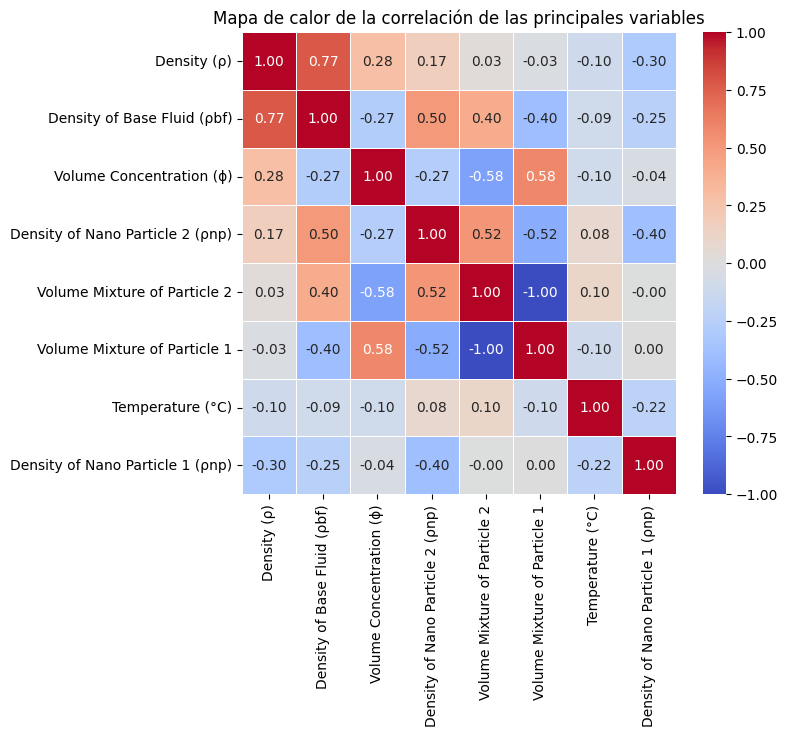

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

# Convertir todas las columnas a valores numéricos (forzando errores a NaN si no se puede convertir)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Imputar valores faltantes con la media de cada columna
df_imputado = df_numeric.fillna(df_numeric.mean())

# Calcular la matriz de correlación
corr_matrix = df_imputado.corr()

# Ordenar la matriz de correlación por la correlación absoluta con la variable objetivo (Density of Base Fluid (ρbf))
corr_sorted = corr_matrix['Density (ρ)'].sort_values(ascending=False)

# Seleccionar las variables más correlacionadas (puedes ajustar el número de variables que deseas ver)
top_corr = corr_sorted.head(10)  # Top 10 variables correlacionadas

# Crear la gráfica de correlación
plt.figure(figsize=(7, 6))
sns.heatmap(df_imputado[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de la correlación de las principales variables')
plt.show()

In [ ]:
corr_sorted

,Density (ρ)
Density (ρ),1.0000
Density of Base Fluid (ρbf),0.7740
Volume Concentration (ϕ),0.2839
Density of Nano Particle 2 (ρnp),0.1709
Volume Mixture of Particle 2,0.0290
Volume Mixture of Particle 1,-0.0290
Temperature (°C),-0.1035
Density of Nano Particle 1 (ρnp),-0.2985


In [ ]:
# Colocar las variabes de estudio comenzando por la variable a predecir

VariablesEstudio = ['Density (ρ)', 'Density of Base Fluid (ρbf)', 'Volume Concentration (ϕ)','Density of Nano Particle 2 (ρnp)']
df_estudio = df_imputado[VariablesEstudio]
df_estudio.head(5)

,Density (ρ),Density of Base Fluid (ρbf),Volume Concentration (ϕ),Density of Nano Particle 2 (ρnp)
0,1004.8148,998.2900,0.0500,2220
1,1002.2222,995.7100,0.0500,2220
2,997.0370,992.2500,0.0500,2220
3,994.4444,988.0200,0.0500,2220
4,990.0000,983.1300,0.0500,2220


In [ ]:
# Calcular estadísticos
df_estudio.describe().T

,count,mean,std,min,25%,50%,75%,max
Density (ρ),436.0000,1016.3673,22.6950,983.0100,998.6873,1010.3191,1028.1730,1093.4320
Density of Base Fluid (ρbf),436.0000,998.2439,17.7231,977.6000,990.2200,994.0800,997.1300,1063.0000
Volume Concentration (ϕ),436.0000,0.5948,0.6412,0.0000,0.1000,0.3000,1.0000,2.0000
Density of Nano Particle 2 (ρnp),436.0000,2470.6422,895.0441,1910.0000,2100.0000,2100.0000,2220.0000,5810.0000


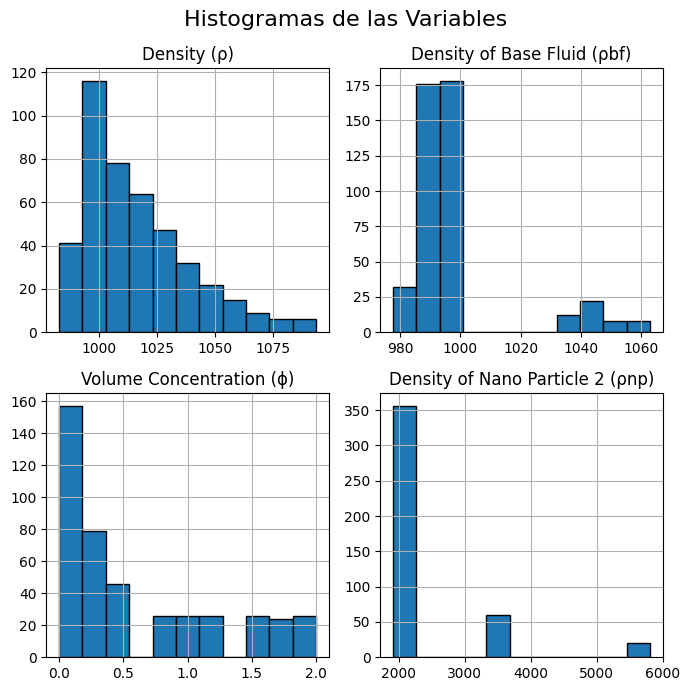

In [ ]:
# Genera Histográmas
df_estudio.hist(bins=11, figsize=(7, 7), grid=True, edgecolor='black')
plt.suptitle('Histogramas de las Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Código Modelo Regresión Lineal
# Datos de entrada
X1 = df_estudio.iloc[:, 1]
X2 = df_estudio.iloc[:, 2]
X3 = df_estudio.iloc[:, 3]
Y  = df_estudio.iloc[:, 0]

# Construcción de la matriz X con una columna de unos para la intersección
X_matrix = np.column_stack((np.ones(len(X1)), X1, X2, X3))

# Cálculo de los coeficientes usando la pseudoinversa
beta = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

# Separación de coeficientes
b, a1, a2, a3 = beta

# Calcular valores predichos
Y_pred = X_matrix @ beta

# Calcular R^2
SS_res = np.sum((Y - Y_pred) ** 2)       # Suma de residuos al cuadrado
SS_tot = np.sum((Y - np.mean(Y)) ** 2)   # Suma total de cuadrados
R2 = 1 - (SS_res / SS_tot)

# Mostrar ecuación y R^2
print(f"Ecuación de regresión:\n")
print(f"Y = {a1:.3f} X1 + {a2:.3f} X2 + {a3:.3f} X3 + {b:.3f}\n")
print(f"Coeficiente de determinación (R²): {R2:.4f}")


Ecuación de regresión:

Y = 1.294 X1 + 17.951 X2 + -0.005 X3 + -273.600

Coeficiente de determinación (R²): 0.8925


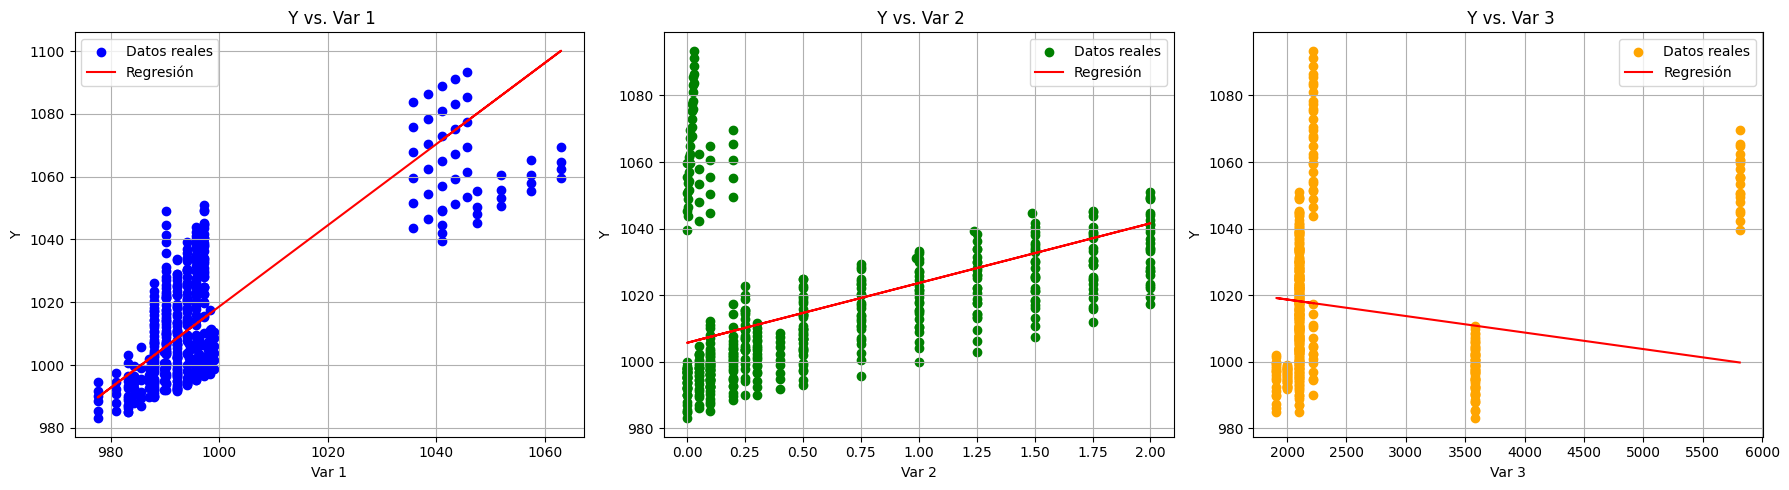

In [ ]:
import matplotlib.pyplot as plt

# Crear figura con tamaño adecuado para 3 subgráficas
plt.figure(figsize=(18, 5))

# -------- Gráfica de Y vs X1 (Tamaño de la casa) --------
plt.subplot(1, 3, 1)
plt.scatter(X1, Y, color='blue', label='Datos reales')
plt.plot(X1, a1 * X1 + a2 * X2.mean() + a3 * X3.mean() + b, color='red', label='Regresión')
plt.xlabel("Var 1")
plt.ylabel("Y")
plt.title(" Y vs. Var 1")
plt.legend()
plt.grid(True)

# -------- Gráfica de Y vs X2 (Número de habitaciones) --------
plt.subplot(1, 3, 2)
plt.scatter(X2, Y, color='green', label='Datos reales')
plt.plot(X2, a1 * X1.mean() + a2 * X2 + a3 * X3.mean() + b, color='red', label='Regresión')
plt.xlabel("Var 2")
plt.ylabel("Y")
plt.title(" Y vs. Var 2")
plt.legend()
plt.grid(True)

# -------- Gráfica de Y vs X3 (Edad de la casa, por ejemplo) --------
plt.subplot(1, 3, 3)
plt.scatter(X3, Y, color='orange', label='Datos reales')
plt.plot(X3, a1 * X1.mean() + a2 * X2.mean() + a3 * X3 + b, color='red', label='Regresión')
plt.xlabel("Var 3")
plt.ylabel("Y")
plt.title(" Y vs. Var 3")
plt.legend()
plt.grid(True)

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

In [ ]:
def predecir_y(beta, x1, x2, x3):
    """
    Predice el valor de Y dado un conjunto de variables independientes y los coeficientes del modelo.
    """
    b, a1, a2, a3 = beta
    y_estimada = a1 * x1 + a2 * x2 + a3 * x3 + b
    print(f"\nPara X1={x1}, X2={x2}, X3={x3} → Y estimado = {y_estimada:.3f}")
    return y_estimada

In [ ]:
y_est = predecir_y(beta, x1=980, x2=20, x3=200)


Para X1=980, X2=20, X3=200 → Y estimado = 1352.384
